<a href="https://colab.research.google.com/github/eovallemagallanes/Digital-Image-Processing/blob/main/lecture11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outlier method

1. Choose a threshold value $D$.
2. For a given pixel, compare its value $p$ with the mean $\mu$ of the values of its eight neighbours.
3. If $|p - \mu|$ > D, then classify the pixel as noisy, otherwise not.
4. If the pixel is noisy, replace its value with $\mu$; otherwise leave its value unchanged.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
from skimage.filters import median
from skimage.morphology import square

from scipy import signal
from sklearn.metrics import mean_squared_error
import time

In [6]:
def outlierconv2d(image, kernel_size=3, D=0.2):
    # define kernel
    ks2= kernel_size//2
    N = kernel_size*kernel_size
    kernel = 1/N * np.ones((kernel_size, kernel_size))
    kernel[ks2, ks2] = 0

    img_filter = signal.convolve2d(image, kernel, mode='same')
    r = 1.*(abs(image - img_filter) > D)

    new_image = r*img_filter + (1-r)*image
    return new_image

In [7]:
# working in range [0.0, 255.0]
img = skimage.img_as_float(skid.chelsea()) #*255.0

# convert to gray-scale image
gray_img = skic.rgb2gray(img)

# add s&p noise
noise_img = sku.random_noise(gray_img, 's&p', salt_vs_pepper=0.5, amount=0.1)

time outlier filter:  0.008108377456665039
mse outlier filter:  0.0016682838665362635
time median filter:  0.025269031524658203
mse median filter:  0.0004733931524510768


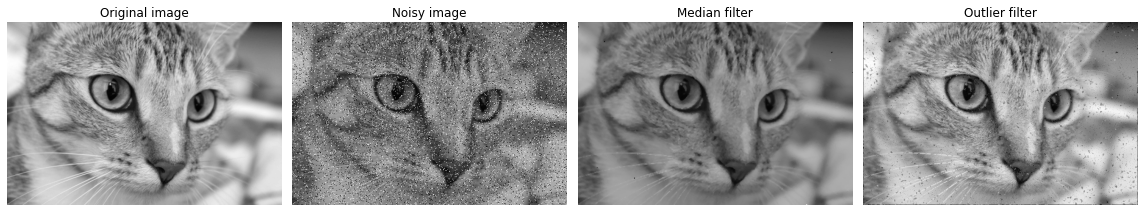

In [8]:
# outlier filter
start = time.time()
res_img = outlierconv2d(noise_img, kernel_size=3, D=0.2)
end = time.time()

print('time outlier filter: ', end - start)
mse1 = mean_squared_error(gray_img, res_img)
print('mse outlier filter: ', mse1)

# median filter
start = time.time()
med_img = median(noise_img, square(3))
end = time.time()
print('time median filter: ', end - start)
mse2 = mean_squared_error(gray_img, med_img)
print('mse median filter: ', mse2)


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 16))
ax = axes.ravel()
ax[0].imshow(gray_img, cmap='gray')
ax[0].set_title("Original image")
ax[1].imshow(noise_img, cmap='gray')
ax[1].set_title("Noisy image")
ax[2].imshow(med_img, cmap='gray')
ax[2].set_title("Median filter")
ax[3].imshow(res_img, cmap='gray')
ax[3].set_title("Outlier filter")

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [12]:
def runOutlier(img, img_noise, D=0.2, kernel_size=3):
    kernel_size = int(kernel_size)
    start = time.time()
    res_img = outlierconv2d(img_noise, kernel_size, D)
    end = time.time()
    print('Time Outlier filter: ', end - start, '(s)')

    mse = mean_squared_error(img, res_img)
    print('MSE: ', mse)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 16))
    ax = axes.ravel()
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title("Original image")
    ax[1].imshow(img_noise, cmap='gray')
    ax[1].set_title("Noisy image")
    ax[2].imshow(res_img, cmap='gray')
    ax[2].set_title("Outlier filter")

    for a in ax:
        a.set_axis_off()

    plt.tight_layout()
    plt.show()

    return res_img

In [10]:
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import FloatSlider, Checkbox

In [13]:
threshold_widget = FloatSlider(min=0.0, max=1.0, step=0.1, value=0.5, continuous_update=False)
kernel_widget = FloatSlider(min=3, max=11, step=2, value=3, continuous_update=False)

w = interactive(runOutlier,img=fixed(gray_img), img_noise=fixed(noise_img), D=threshold_widget, kernel_size=kernel_widget);
display(w)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='D', max=1.0), FloatSlider(v…